# Importing essential libraries required for the project

In [37]:
# Used for data manipulation and analysis, particularly for handling datasets in DataFrame format.
import pandas as pd 
# Enables data visualization and plotting functionalities.
import matplotlib.pyplot as plt
# Provides tools and algorithms for the creation, manipulation, and study of complex networks or graphs.
import networkx as nx

# PART 1 > TASK 1: Read the dataset file from the CSV files

In [38]:
# Define a dictionary for mapping specific columns to string data type
dtype_mapping = {'sport': str, 'dport': str}

# Read the CSV file into a DataFrame
df = pd.read_csv('UNSW_2018_IoT_Botnet_Full5pc_1.csv', dtype=dtype_mapping, low_memory=False)

# Display the first few rows of the DataFrame
df

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1,1.528089e+09,e,1,tcp,1,192.168.100.147,49960,192.168.100.7,80,...,1.127040,96,75,1.133720,1.129970,770,602,1,DoS,HTTP
1,2,1.528089e+09,e,1,arp,2,192.168.100.7,-1,192.168.100.147,-1,...,15267.200000,1,2,0.005142,0.005142,2,6,1,DoS,HTTP
2,3,1.528089e+09,e,1,tcp,1,192.168.100.147,49962,192.168.100.7,80,...,1.127040,96,75,1.135100,1.129970,770,602,1,DoS,HTTP
3,4,1.528089e+09,e,1,tcp,1,192.168.100.147,49964,192.168.100.7,80,...,1.127040,96,75,1.135140,1.129970,770,602,1,DoS,HTTP
4,5,1.528089e+09,e,1,tcp,1,192.168.100.147,49966,192.168.100.7,80,...,1.127040,96,75,1.135260,1.129970,770,602,1,DoS,HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,1.528085e+09,e,1,udp,3,192.168.100.148,37148,192.168.100.6,80,...,0.319979,54,54,0.319979,0.360424,432,432,1,DoS,UDP
999996,999997,1.528085e+09,e,1,udp,3,192.168.100.148,37149,192.168.100.6,80,...,0.319979,54,54,0.319979,0.360424,432,432,1,DoS,UDP
999997,999998,1.528085e+09,e,1,udp,3,192.168.100.148,37150,192.168.100.6,80,...,0.319979,54,54,0.319979,0.360424,432,432,1,DoS,UDP
999998,999999,1.528085e+09,e,1,udp,3,192.168.100.148,37151,192.168.100.6,80,...,0.319979,54,54,0.319979,0.360424,432,432,1,DoS,UDP


# PART 1 > TASK 2: Describe each attribute in the dataset in the simplest way

### DataFrame Exploration:
- `df.info()`: Provides a summary of the DataFrame, including column names, data types, non-null counts, and memory usage.

- `df.describe()`: Generates statistical information (such as count, mean, standard deviation, minimum, maximum, etc.) for numerical columns in the DataFrame.

- `for column in df.columns: print(f"{column}: {df[column].unique()}")`: Loops through each column in the DataFrame and displays the unique values present in each column. This aids in understanding the distinct values and categories within the dataset columns.

In [39]:
# Display basic information about the DataFrame
print(df.info())

# Display statistical information about numerical columns in the DataFrame (count, mean, std, min, max, etc.)
print(df.describe())

# Display unique values for each column in the DataFrame
for column in df.columns:
    print(f"{column}: {df[column].unique()}")
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 46 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   pkSeqID                           1000000 non-null  int64  
 1   stime                             1000000 non-null  float64
 2   flgs                              1000000 non-null  object 
 3   flgs_number                       1000000 non-null  int64  
 4   proto                             1000000 non-null  object 
 5   proto_number                      1000000 non-null  int64  
 6   saddr                             1000000 non-null  object 
 7   sport                             1000000 non-null  object 
 8   daddr                             1000000 non-null  object 
 9   dport                             1000000 non-null  object 
 10  pkts                              1000000 non-null  int64  
 11  bytes                             1000

# PART 1 > TASK 3 - Directed Graph Visualization:
**Objective**: 
    - Generate a directed graph visualization representing connections between source and destination IP addresses.
    
**Process**:
    - Utilizes NetworkX to create an empty directed graph.
    - Iterates through the dataset, adding edges based on source ('saddr') and destination ('daddr') IP addresses.
    - Computes the positions of nodes using the circular layout algorithm for better visualization.
    - Draws the directed graph with labeled nodes, setting the font size and node size attributes.
    
**Outcome**: 
    - Displays a visualization showcasing connections between source and destination IP addresses in the dataset.


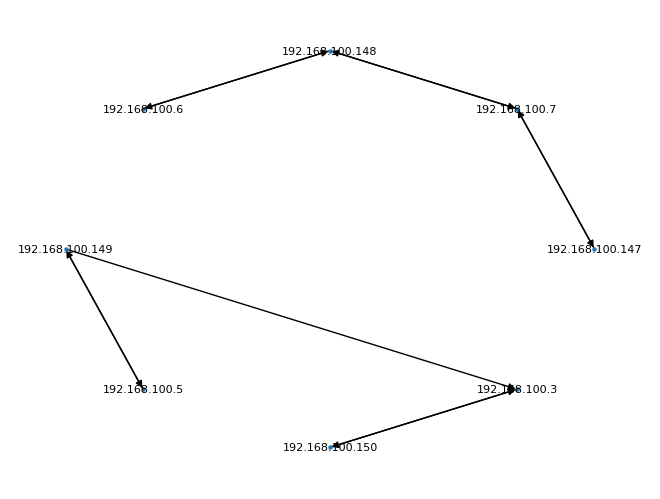

In [40]:
# Create an empty directed graph using NetworkX
G = nx.DiGraph()

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    # Add edges to the graph using source ('saddr') and destination ('daddr') IP addresses
    G.add_edge(row['saddr'], row['daddr'])

# Compute node positions using the spring layout algorithm for better visualization
pos = nx.circular_layout(G)

# Draw the directed graph with labeled nodes, setting font size and node size
nx.draw(G, pos, with_labels=True, font_size=8, node_size=5)

# Display the generated graph
plt.show()


# PART 1 > Task 4 - Visualization of Byte Distribution:
**Objective**:
    - Visualize the distribution pattern of values within the 'bytes' column.

**Process:**
    - Utilizes Matplotlib's plt.hist function to create a histogram plot.
    - Divides the 'bytes' column into 50 bins and sets the edge color to black for clear demarcation.
    - Titles the plot as 'Distribution of Bytes' and labels the x-axis as 'Bytes' and the y-axis as 'Frequency.'
    
**Outcome:** 
    - Displays a histogram representing the distribution pattern of byte values within the dataset.


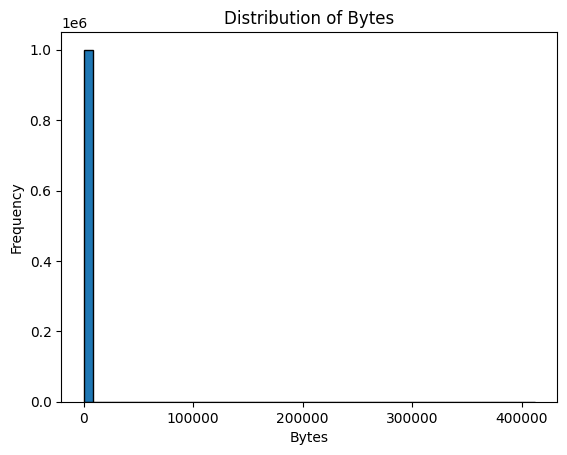

In [41]:
# Create a histogram plot to visualize the distribution of 'bytes' column
plt.hist(df['bytes'], bins=50, edgecolor='black')

# Set the title, x-axis label, and y-axis label for the histogram
plt.title('Distribution of Bytes')
plt.xlabel('Bytes')
plt.ylabel('Frequency')

# Display the histogram plot
plt.show()


# PART 2 > Task 5.a - Network Visualization with IP Nodes and Event Edges:
**Objective:** 
    - Visualize a network where IP addresses serve as nodes and 'pkSeqID' is utilized as an event attribute for edges.
    
**Process:**
    - Creates an empty directed graph using NetworkX (nx.DiGraph()).
    - Iterates through the DataFrame, adding edges using 'saddr' as source, 'daddr' as destination, and 'pkSeqID' as an event attribute.
    - Uses the circular layout algorithm for node placement.
    - Draws the graph using NetworkX, specifying labels, font size, and node size.
    - Sets the title of the graph as 'IP as Nodes, Event as Edges.

**Outcome:** 
    - Presents a network visualization where IP addresses are represented as nodes, and event attributes ('pkSeqID') are depicted as edges between nodes.


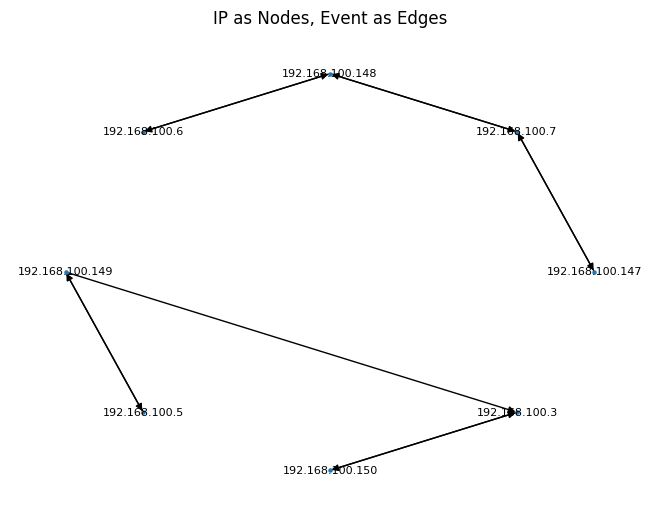

In [42]:
# Create an empty directed graph using NetworkX
G = nx.DiGraph()

# Iterate through the DataFrame and add edges with 'saddr' as source, 'daddr' as destination, and 'pkSeqID' as an event attribute
for index, row in df.iterrows():
    G.add_edge(row['saddr'], row['daddr'], event=row['pkSeqID'])

# Generate the layout for the graph
pos = nx.circular_layout(G)

# Draw the graph using NetworkX, with labels, custom font size, and node size
nx.draw(G, pos, with_labels=True, font_size=8, node_size=5)

# Set the title for the graph
plt.title('IP as Nodes, Event as Edges')

# Display the graph
plt.show()


# PART 2 > Task 5.b - Construct a graph representation using events as nodes.
**Objective**: 
    - Create a graph representation using attack events as nodes and IP addresses as edges.
    
**Process:**
    - Initializes an empty list to store edges.
    - Iterates through the DataFrame, collecting source and destination IPs and attack types.
    - Constructs a directed graph using NetworkX, employing attack types as nodes and IP addresses as edges.
    - Visualizes the graph with circular layout, incorporating labels, custom font size, and node size.
    - Sets the graph's title as 'Attack as Nodes, IP as Edges.

**Outcome:**
    - Presents a graphical representation where attack events are depicted as nodes, connected via IP addresses as edges.


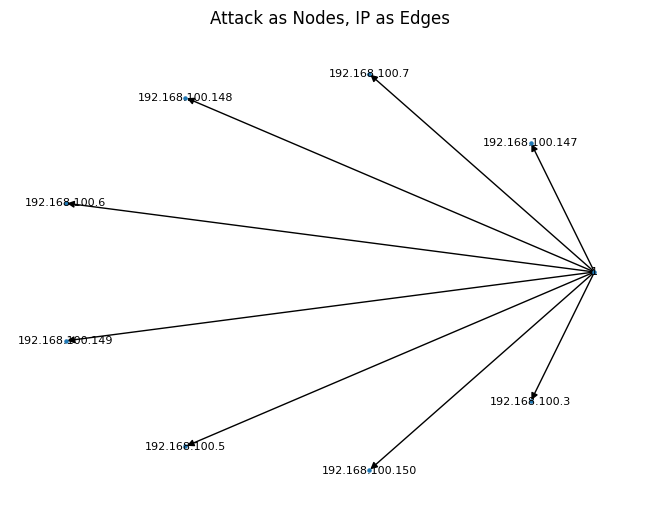

In [43]:
# Create an empty list to store edges
edges = []

# Iterate over the DataFrame to add edges
for index, row in df.iterrows():
    # Retrieve source and destination IP addresses
    source_ip, destination_ip = row['saddr'], row['daddr']
    attack_type = row['attack']  # Get the attack type

    # Append edges using attack as nodes and IPs as edges
    edges.append((attack_type, source_ip))
    edges.append((attack_type, destination_ip))

# Create a directed graph using the list of edges
G = nx.DiGraph(edges)

# Visualize the graph
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, font_size=8, node_size=5)
plt.title('Attack as Nodes, IP as Edges')
plt.show()



# PART 2 > Task 5.c - Generate a graph representation with an arbitrary attribute as nodes.
**Objective:** 
    - Create a graph representation where an arbitrary attribute (in this case, 'proto') is depicted as nodes, with IP addresses as edges.
    
**Process:**
    - Initializes a directed graph using NetworkX.
    - Iterates through the DataFrame, adding edges to the graph using 'saddr' as source, 'daddr' as destination, and 'proto' as the attribute for each edge.
    - Generates the layout for the graph using circular layout.
    - Visualizes the graph with labeled nodes, custom font size, and node size.
    - Sets the title of the graph as 'Attribute as Nodes, IP as Edges.

**Outcome:** 
    - Generates a graphical representation where an arbitrary attribute (in this case, 'proto') is illustrated as nodes, connected via IP addresses as edges.

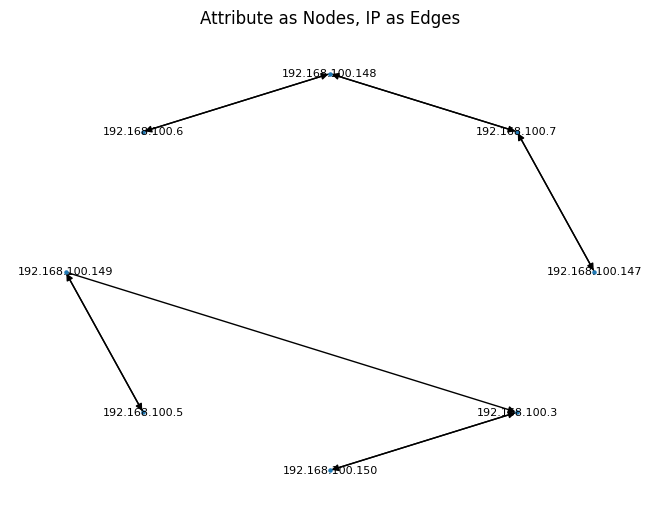

In [44]:
# Construct a directed graph with an attribute as nodes and IPs as edges
G = nx.DiGraph()
for index, row in df.iterrows():
    G.add_edge(row['saddr'], row['daddr'], proto=row['proto'])

# Create the layout and visualize the graph
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, font_size=8, node_size=5)
plt.title('Attribute as Nodes, IP as Edges')
plt.show()


# PART 3 > Task 6 - Automate the process of representation using graphs to let users decide which attribute as node and which attribute as edges.

**Usage:**
    - The user is prompted to enter the attribute to be used as nodes and two attributes to be used as edges.
    - The script creates a graph based on the user-input attributes using the create_graph function.
    - The resulting graph is visualized using the visualize_graph function, showing the chosen node attribute and selected edge attributes.
    - This implementation allows users to dynamically choose the attributes for nodes and edges, creating a visual representation of the dataset based on their selections.

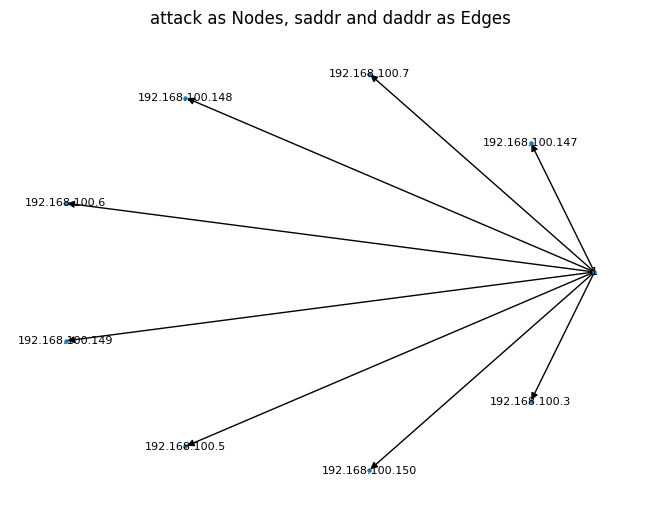

In [45]:
def create_graph(df, node_attribute, edge_attributes):
    """
    Create a directed graph based on user-selected attributes.

    Parameters:
    - df: DataFrame containing the dataset
    - node_attribute: Name of the attribute to use as nodes
    - edge_attributes: List of names of attributes to use as edges

    Returns:
    - A NetworkX graph
    """
    G = nx.DiGraph()

    # Add nodes and edges based on user-selected attributes
    for index, row in df.iterrows():
        node_value = row[node_attribute]
        G.add_node(node_value)
        for edge_attr in edge_attributes:
            edge_value = row[edge_attr]
            G.add_edge(node_value, edge_value)

    return G

def visualize_graph(G, title):
    """
    Visualize the graph.

    Parameters:
    - G: NetworkX graph
    - title: Title for the graph
    """
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, font_size=8, node_size=5)
    plt.title(title)
    plt.show()

# User input for node and edge attributes
node_attribute = input("Enter the attribute to use as nodes: ")
edge_attribute1 = input("Enter the first attribute to use as edges: ")
edge_attribute2 = input("Enter the second attribute to use as edges: ")

# Create the graph based on user input
graph = create_graph(df, node_attribute, [edge_attribute1, edge_attribute2])

# Visualize the graph
visualize_graph(graph, f'{node_attribute} as Nodes, {edge_attribute1} and {edge_attribute2} as Edges')

# PART 3 > Task 7 - Using the plot of the graph to visualize it

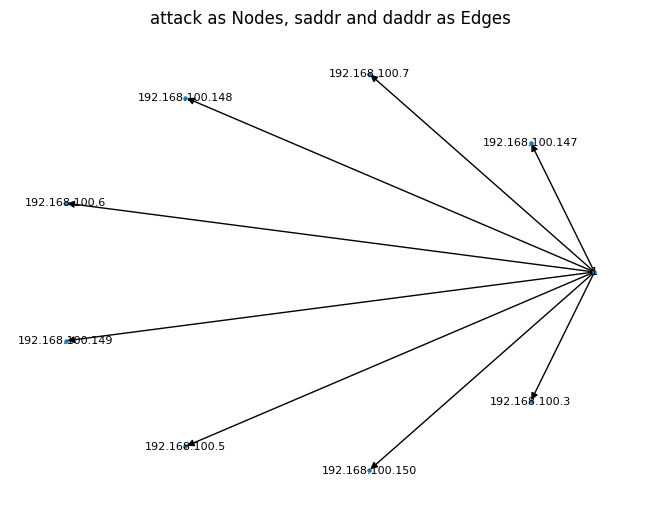

In [46]:
# Visualize the graph
visualize_graph(graph, f'{node_attribute} as Nodes, {edge_attribute1} and {edge_attribute2} as Edges')

# PART 3 > Task 8 - Create a function to find anyone's path from a given origin to a given destiny.

**Objective:**
The goal of this code segment is to find all possible paths between different nodes within a dataset using Depth First Search (DFS) algorithm. It prompts users to specify the column names representing source and destination IP addresses. Then, it constructs a directed graph based on these columns and discovers all paths between unique source and destination nodes.

**Process:**
    - Functions Definition:
        - find_all_paths: Recursively finds all possible paths between nodes using DFS.
        - create_graph: Generates a directed graph from source and destination IP columns.

    - User Input:
        - Prompt for the column names representing source and destination IP addresses.
    
    - Graph Construction and Path Finding:
        - Create a directed graph using the specified columns for source and destination IPs.
        - Iterate through all combinations of unique source and destination nodes.
        - Find all paths between these nodes using DFS.

**Outcome:**
    - Displays all found paths between different nodes based on the specified source and destination columns.
    - If no paths are found, it prints a message indicating the absence of paths between different nodes in the dataset.

In [47]:
# Create a function to find all paths using Depth First Search (DFS)
def find_all_paths(graph, start, end, path=[]):
    """
    Find all possible paths between two nodes using Depth First Search (DFS).

    Parameters:
    - graph: NetworkX graph representing connections between nodes
    - start: Starting node
    - end: Destination node
    - path: List to track the current path (default=[])

    Returns:
    - List of all possible paths between start and end nodes
    """
    path = path + [start]
    if start == end:
        return [path]
    if start not in graph:
        return []
    paths = []
    for node in graph[start]:
        if node not in path:
            new_paths = find_all_paths(graph, node, end, path)
            for new_path in new_paths:
                paths.append(new_path)
    return paths

# Create a directed graph based on provided 'saddr' and 'daddr' columns for source and destination IPs
def create_graph(dataframe, source_column, dest_column):
    """
    Create a directed graph from source and destination IP columns in the DataFrame.

    Parameters:
    - dataframe: DataFrame containing the dataset
    - source_column: Column name for source IP addresses
    - dest_column: Column name for destination IP addresses

    Returns:
    - A NetworkX directed graph representing connections between nodes
    """
    G = nx.DiGraph()
    for _, row in dataframe.iterrows():
        source = row[source_column]
        dest = row[dest_column]
        G.add_edge(source, dest)
    return G

# Prompt for the column names representing 'saddr' and 'daddr'
source_column = input("Enter the column name for the source IP addresses (e.g., saddr): ")
dest_column = input("Enter the column name for the destination IP addresses (e.g., daddr): ")

# Create a directed graph using the specified columns for source and destination IPs
G = create_graph(df, source_column, dest_column)

# Find all paths between all possible combinations of source and destination IPs
all_paths = []
for source_node in df[source_column].unique():
    for dest_node in df[dest_column].unique():
        if source_node != dest_node:
            paths = find_all_paths(G, source_node, dest_node)
            if paths:
                all_paths.extend(paths)

# Print all found paths
if all_paths:
    print(f"All paths between different nodes based on {source_column} and {dest_column}:")
    for path in all_paths:
        print(path)
else:
    print("No paths found between different nodes")


All paths between different nodes based on saddr and daddr:
['192.168.100.147', '192.168.100.7']
['192.168.100.147', '192.168.100.7', '192.168.100.148', '192.168.100.6']
['192.168.100.147', '192.168.100.7', '192.168.100.148']
['192.168.100.7', '192.168.100.147']
['192.168.100.7', '192.168.100.148', '192.168.100.6']
['192.168.100.7', '192.168.100.148']
['192.168.100.148', '192.168.100.7']
['192.168.100.148', '192.168.100.7', '192.168.100.147']
['192.168.100.148', '192.168.100.6']
['192.168.100.6', '192.168.100.148', '192.168.100.7']
['192.168.100.6', '192.168.100.148', '192.168.100.7', '192.168.100.147']
['192.168.100.6', '192.168.100.148']
['192.168.100.149', '192.168.100.5']
['192.168.100.149', '192.168.100.3']
['192.168.100.149', '192.168.100.3', '192.168.100.150']
['192.168.100.150', '192.168.100.3']
['192.168.100.5', '192.168.100.149', '192.168.100.3']
['192.168.100.5', '192.168.100.149']
['192.168.100.5', '192.168.100.149', '192.168.100.3', '192.168.100.150']
['192.168.100.3', '19


# PART 3 > Task 9 - Create a function to evaluate how many packets were sent using a path between IPs. Verify this by comparing your results to different implementations of the path function.

**Objective:**
The goal of this code segment is to find all possible paths between different nodes within a dataset using Depth First Search (DFS) algorithm. It prompts users to specify the column names representing source and destination IP addresses. Then, it constructs a directed graph based on these columns and discovers all paths between unique source and destination nodes.

**Process:**
    - The script starts by prompting the user to input the column names for the source and destination IP addresses within the dataset.
    - It then creates a directed graph using NetworkX based on the specified columns for source and destination IPs.
    - Next, it finds all possible paths between the unique combinations of source and destination IPs using DFS.
    - For each identified path, it calculates the total number of packets sent along that path by summing the 'pkts' column values in the DataFrame.

**Outcome:**
    - Displays all found paths between different nodes along with the number of packets sent along each path. If no paths are found, it indicates the absence of paths between different nodes within the dataset.

In [48]:

# Create a function to find all paths using Depth First Search (DFS)
def find_all_paths(graph, start, end, path=[]):
    """
    Finds all possible paths between two nodes using Depth First Search (DFS).

    Parameters:
    - graph: NetworkX graph object
    - start: Starting node
    - end: Destination node
    - path: List of nodes forming the path (initialized as empty)

    Returns:
    - List containing all possible paths
    """

    path = path + [start]
    if start == end:
        return [path]
    if start not in graph:
        return []
    paths = []
    for node in graph[start]:
        if node not in path:
            new_paths = find_all_paths(graph, node, end, path)
            for new_path in new_paths:
                paths.append(new_path)
    return paths

# Create a function to calculate the number of packets sent along a given path
def packets_sent_along_path(df, path):
    """
    Calculates the total number of packets sent along a given path.

    Parameters:
    - df: DataFrame containing the dataset
    - path: List of nodes forming the path

    Returns:
    - Total packets sent along the path
    """

    packets = 0
    for i in range(len(path) - 1):
        source = path[i]
        dest = path[i + 1]
        packets += df[(df['saddr'] == source) & (df['daddr'] == dest)]['pkts'].sum()
    return packets

# Create a directed graph based on the 'saddr' and 'daddr' columns for source and destination IPs
def create_graph(dataframe, source_column, dest_column):
    """
    Creates a directed graph based on specified columns for source and destination IPs.

    Parameters:
    - dataframe: DataFrame containing the dataset
    - source_column: Name of the column representing source IP addresses
    - dest_column: Name of the column representing destination IP addresses

    Returns:
    - A NetworkX directed graph
    """

    G = nx.DiGraph()
    for _, row in dataframe.iterrows():
        source = row[source_column]
        dest = row[dest_column]
        G.add_edge(source, dest)
    return G

# Prompt for the column names representing 'saddr' and 'daddr'
source_column = input("Enter the column name for the source IP addresses (e.g., saddr): ")
dest_column = input("Enter the column name for the destination IP addresses (e.g., daddr): ")

# Create a directed graph using the specified columns for source and destination IPs
G = create_graph(df, source_column, dest_column)

# Find all paths between all possible combinations of source and destination IPs
all_paths = []
for source_node in df[source_column].unique():
    for dest_node in df[dest_column].unique():
        if source_node != dest_node:
            paths = find_all_paths(G, source_node, dest_node)
            if paths:
                all_paths.extend(paths)

# Print all found paths and the number of packets sent along each path
if all_paths:
    print(f"All paths between different nodes based on {source_column} and {dest_column}:")
    for path in all_paths:
        print(path)
        packets_sent = packets_sent_along_path(df, path)
        print(f"Packets sent along this path: {packets_sent}")
else:
    print("No paths found between different nodes")


All paths between different nodes based on saddr and daddr:
['192.168.100.147', '192.168.100.7']
Packets sent along this path: 1676353
['192.168.100.147', '192.168.100.7', '192.168.100.148', '192.168.100.6']
Packets sent along this path: 3358822
['192.168.100.147', '192.168.100.7', '192.168.100.148']
Packets sent along this path: 1676357
['192.168.100.7', '192.168.100.147']
Packets sent along this path: 232
['192.168.100.7', '192.168.100.148', '192.168.100.6']
Packets sent along this path: 1682469
['192.168.100.7', '192.168.100.148']
Packets sent along this path: 4
['192.168.100.148', '192.168.100.7']
Packets sent along this path: 2602
['192.168.100.148', '192.168.100.7', '192.168.100.147']
Packets sent along this path: 2834
['192.168.100.148', '192.168.100.6']
Packets sent along this path: 1682465
['192.168.100.6', '192.168.100.148', '192.168.100.7']
Packets sent along this path: 16156
['192.168.100.6', '192.168.100.148', '192.168.100.7', '192.168.100.147']
Packets sent along this pat

# PART 4 > Task 10 - Use colors to the plot to represent differences between protocols.

**Objective**:
    - This code aims to create a directed graph depicting network connections using 'source' and 'destination' IP addresses from the dataset. It visually represents various network protocols by assigning distinct colors to edges based on the protocols present in the data.

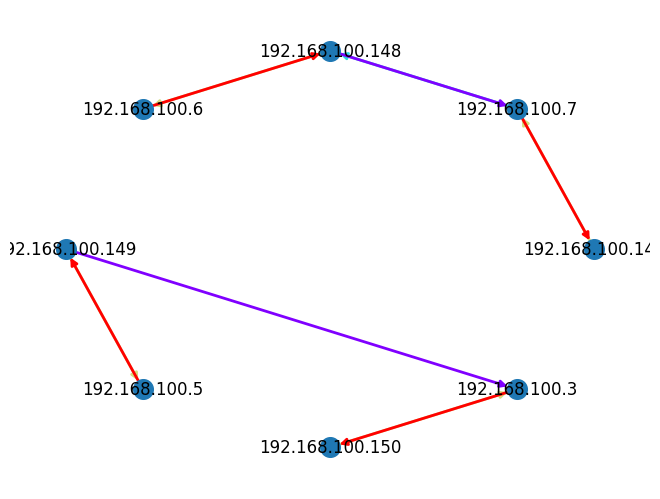

In [49]:
# Create a directed graph based on the 'saddr' and 'daddr' columns for source and destination IPs
G = nx.from_pandas_edgelist(df, source='saddr', target='daddr', edge_attr=True, create_using=nx.DiGraph())

# Get unique protocols from the DataFrame
protocols = df['proto'].unique()

# Create a color map for different protocols
colors = plt.cm.rainbow([i / float(len(protocols) - 1) for i in range(len(protocols))])
protocol_color_map = {protocol: color for protocol, color in zip(protocols, colors)}

# Retrieve edge protocols from the DataFrame
edge_protocols = nx.get_edge_attributes(G, 'proto')

# Assign colors to edges based on their protocols
edge_colors = [protocol_color_map[edge_protocols[edge]] for edge in G.edges()]

# Draw the graph with colored edges representing different protocols
pos = nx.circular_layout(G)  # Change the layout algorithm if needed
nx.draw(G, pos, with_labels=True, node_size=200, edge_color=edge_colors, width=2.0, edge_cmap=plt.cm.rainbow)
plt.show()

# PART 4 > Task 11 - Automate the coloring so the user can choose the attribute and then the representation color based on the difference between values.

**Objective:**
    - This code segment offers a customizable function, create_colored_graph, enabling users to generate a directed graph visualization based on chosen dataset attributes. It allows users to specify source and destination columns, an attribute column for representation (e.g., 'protocol'), and a desired colormap. The resulting graph illustrates attribute differences using distinct edge colors, allowing users to visualize relationships between selected attributes in the dataset.

/var/folders/ny/rhwnxl1d4lg88mw612_q_hp40000gn/T/ipykernel_20057/1092810555.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(colormap, len(attribute_values))


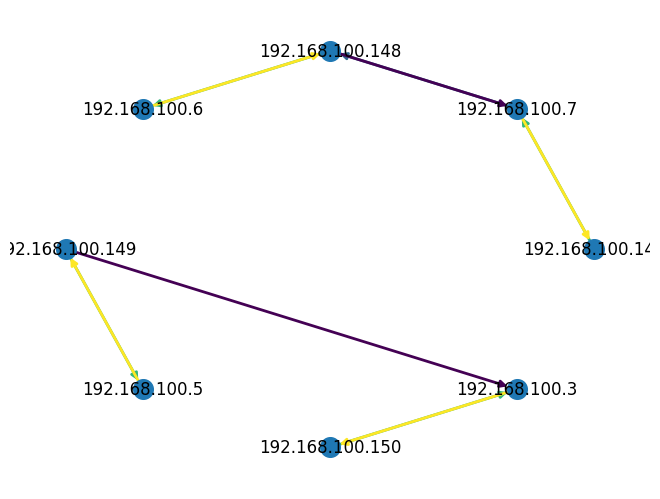

In [50]:
# Function to create a directed graph based on user-selected attributes and color representation
def create_colored_graph(dataframe, source_column, dest_column, attribute_column, colormap):
    # Create a directed graph based on source and destination columns
    G = nx.from_pandas_edgelist(dataframe, source=source_column, target=dest_column, edge_attr=True, create_using=nx.DiGraph())
    
    # Get unique values from the selected attribute column
    attribute_values = dataframe[attribute_column].unique()
    
    # Create a color map for different attribute values
    colors = plt.cm.get_cmap(colormap, len(attribute_values))
    attribute_color_map = {value: colors(i) for i, value in enumerate(attribute_values)}
    
    # Retrieve attribute values from the DataFrame
    edge_attributes = nx.get_edge_attributes(G, attribute_column)
    
    # Assign colors to edges based on their attribute values
    edge_colors = [attribute_color_map[edge_attributes[edge]] for edge in G.edges()]
    
    # Draw the graph with colored edges based on the selected attribute
    pos = nx.circular_layout(G)  # Change the layout algorithm if needed
    nx.draw(G, pos, with_labels=True, node_size=200, edge_color=edge_colors, width=2.0)
    plt.show()

# Prompt user for column names and colormap
source_col = input("Enter the column name for the source IP addresses (e.g., saddr): ")
dest_col = input("Enter the column name for the destination IP addresses (e.g., daddr): ")
attr_col = input("Enter the column name for the attribute to represent (e.g., proto): ")
colormap_name = input("Enter the name of the colormap (e.g., 'viridis', 'coolwarm', etc.): ")

# Create the colored graph based on user-selected attributes and colormap
create_colored_graph(df, source_col, dest_col, attr_col, colormap_name)

# PART 5 > Task 12 - Using the graphs tools give the values or the matrices of values.

**Objective**:
This code calculates various network metrics using NetworkX library functions applied to a given graph 'G':
    - a. Degree Connectivity: Determines the degree of connectivity for each node in the graph.
    - b. Closeness Centrality: Measures the closeness of nodes to others in the network.
    - c. Betweenness Centrality: Assesses the centrality of a node based on the number of shortest paths that pass through it.
    - d. Network Density: Calculates the density of the graph.
    - e. Network Diameter: Evaluates the diameter of the network, representing the longest shortest path between any two nodes.  If the graph isn't connected, it reports that the graph is not connected.
     -f. Network Average Path Length: Computes the average shortest path length in the graph. If the graph isn't connected, it reports that the graph is not connected.

In [51]:
# Assuming 'G' is your graph created using NetworkX

# Degree Connectivity
degree_connectivity = nx.degree(G)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Network Density
network_density = nx.density(G)

# Network Diameter
try:
    network_diameter = nx.diameter(G)
except nx.NetworkXError:
    network_diameter = "Graph is not connected."

# Network Average Path Length
try:
    avg_path_length = nx.average_shortest_path_length(G)
except nx.NetworkXError:
    avg_path_length = "Graph is not connected."

# Print or use these metrics as needed
print("Degree Connectivity:", degree_connectivity)
print("Closeness Centrality:", closeness_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Network Density:", network_density)
print("Network Diameter:", network_diameter)
print("Network Average Path Length:", avg_path_length)

Degree Connectivity: [('192.168.100.147', 2), ('192.168.100.7', 4), ('192.168.100.148', 4), ('192.168.100.6', 2), ('192.168.100.149', 3), ('192.168.100.5', 2), ('192.168.100.150', 2), ('192.168.100.3', 3)]
Closeness Centrality: {'192.168.100.147': 0.21428571428571427, '192.168.100.7': 0.3214285714285714, '192.168.100.148': 0.3214285714285714, '192.168.100.6': 0.21428571428571427, '192.168.100.149': 0.14285714285714285, '192.168.100.5': 0.14285714285714285, '192.168.100.150': 0.21428571428571427, '192.168.100.3': 0.3214285714285714}
Betweenness Centrality: {'192.168.100.147': 0.0, '192.168.100.7': 0.09523809523809523, '192.168.100.148': 0.09523809523809523, '192.168.100.6': 0.0, '192.168.100.149': 0.047619047619047616, '192.168.100.5': 0.0, '192.168.100.150': 0.0, '192.168.100.3': 0.047619047619047616}
Network Density: 0.19642857142857142
Network Diameter: Graph is not connected.
Network Average Path Length: Graph is not connected.
